In [ ]:
%%capture
!pip install wandb #libraries
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #sets the default device to gpu, if that is not available then cpu

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device) #turn our data into a torch tensor with gradient

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device) #turn data into a torch tensor with gradients disabled

def plot(x): #a normal pyplot plot function, we set our defaults for the axes to be off and the colormap to be grayscale
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url): #this function will return the url for our individual slides for use by pytorch
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #this will use the crafted url as an input to retrieve the data from the slides into this notebook
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224): #this function will load and normalize our images so they are uniform
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor



In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
#access json file to make a dictionary of keys based on some defaults in pytorch

model = alexnet(weights='DEFAULT').to(device) #load in alexnet with no change to weights or biases
model.eval(); #change alexnet to evaluation mode

In [ ]:
url = "https://docs.google.com/presentation/d/18WBrYvJbVjY6uxh0-IUJwD0cSwkwJHtPkriP7VpIyTs/edit#slide=id.p" #this will be the url of our document

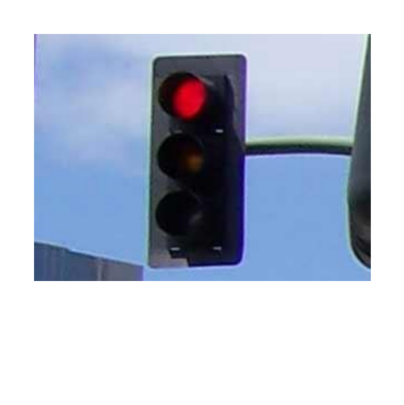

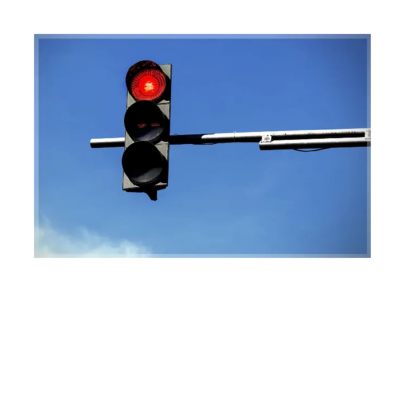

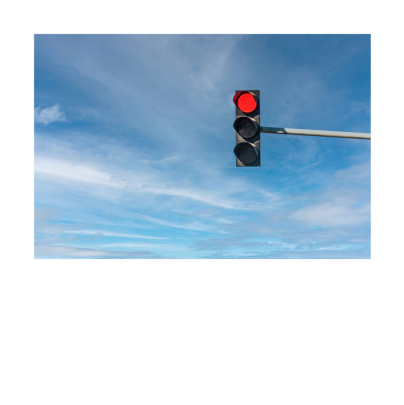

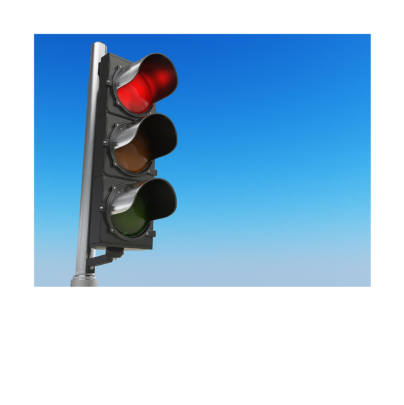

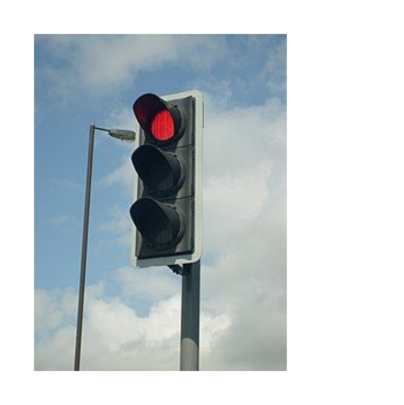

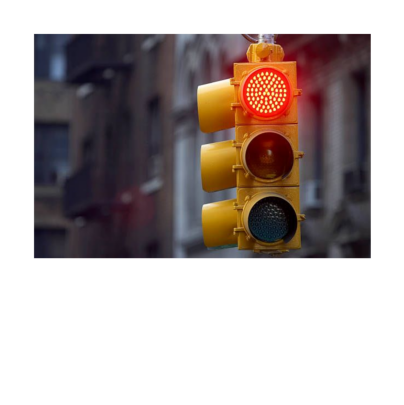

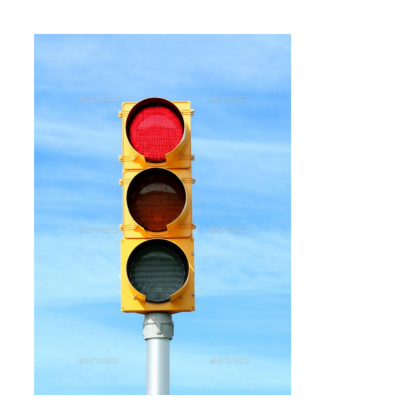

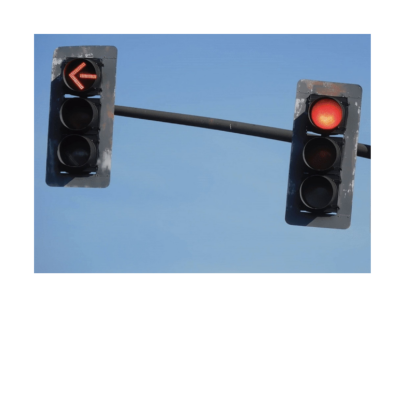

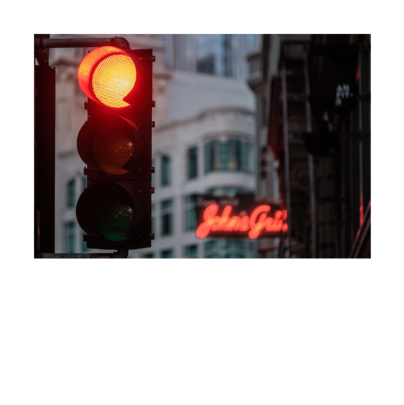

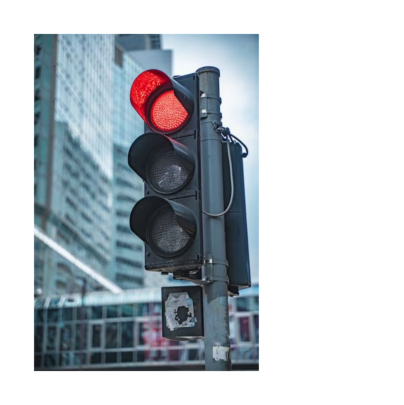

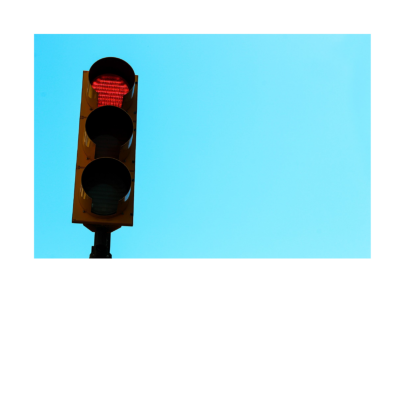

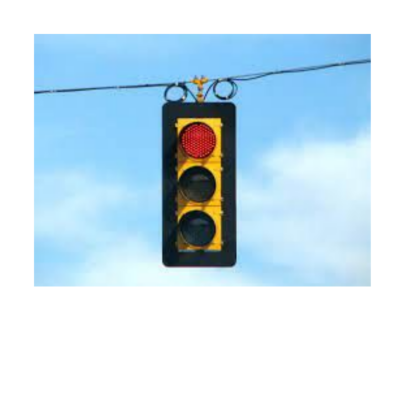

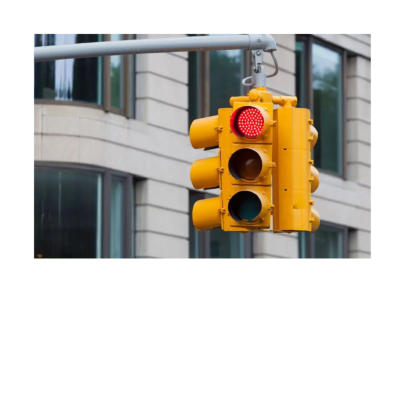

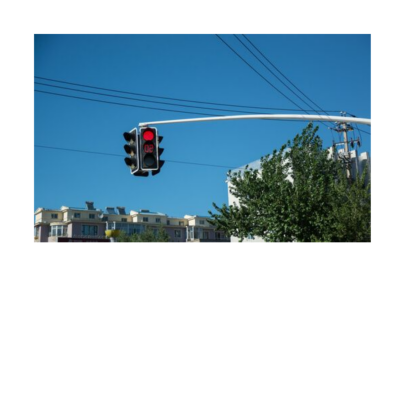

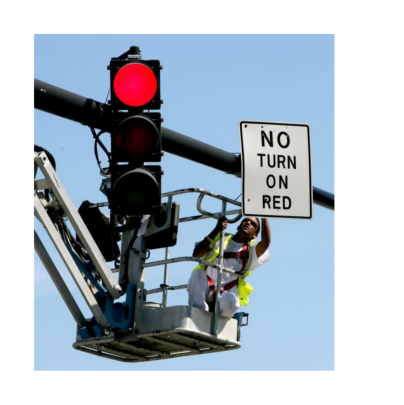

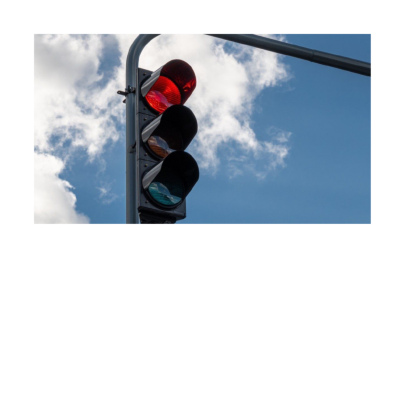

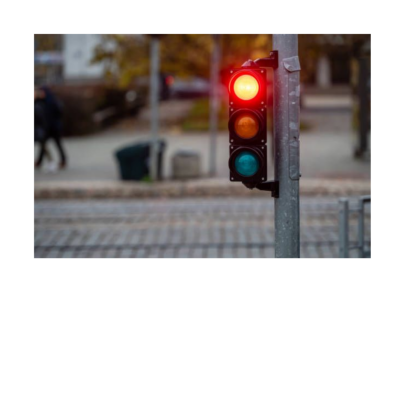

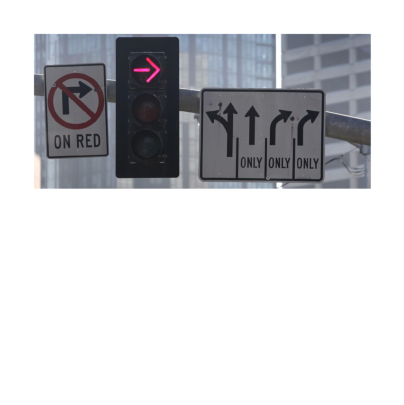

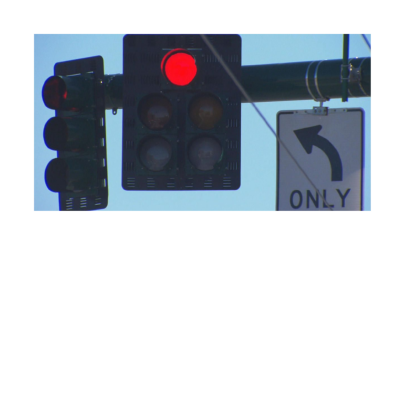

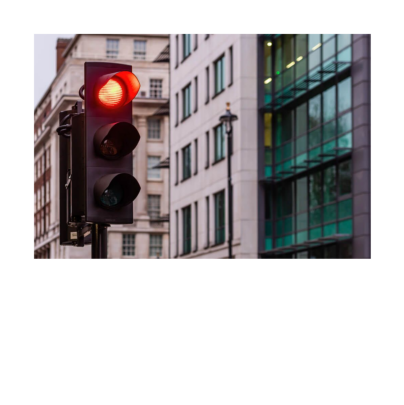

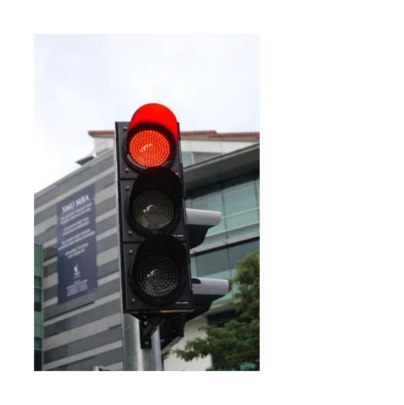

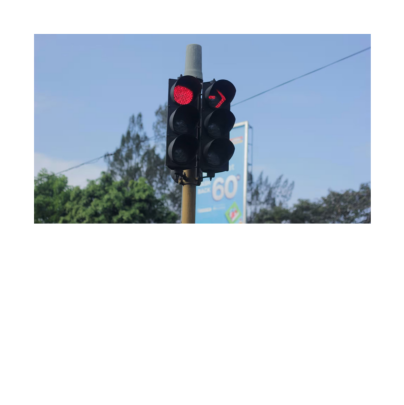

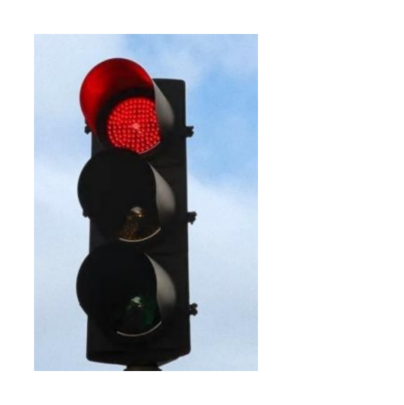

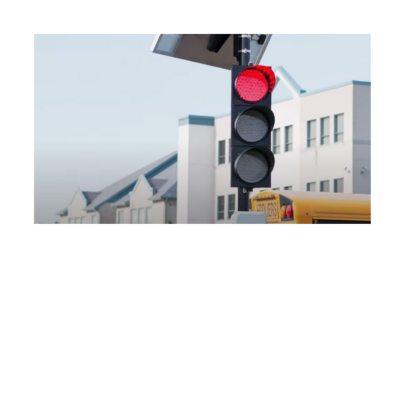

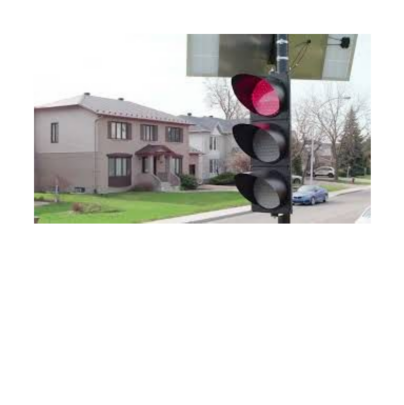

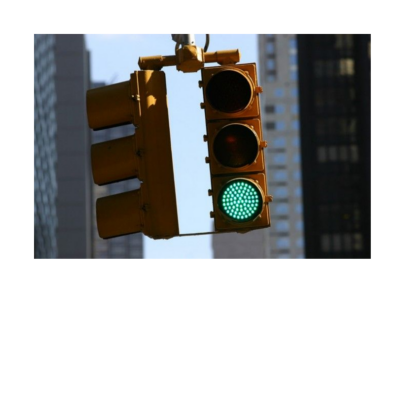

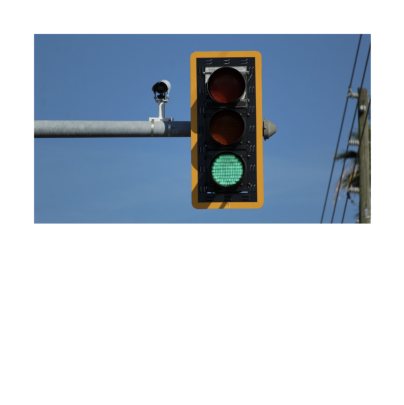

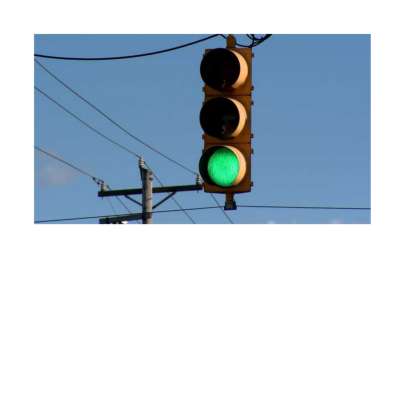

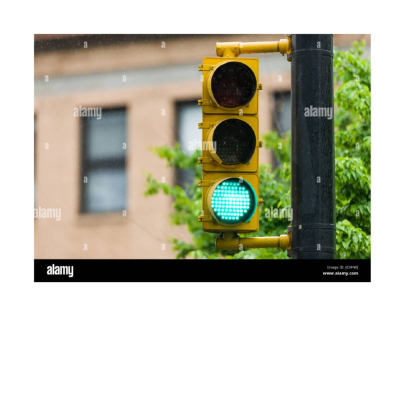

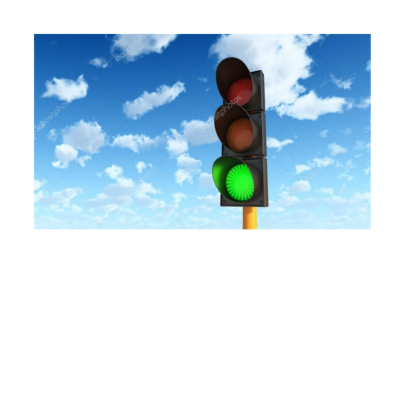

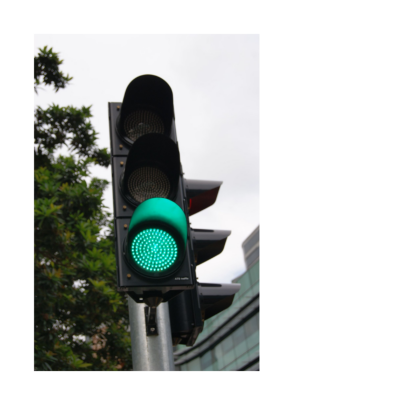

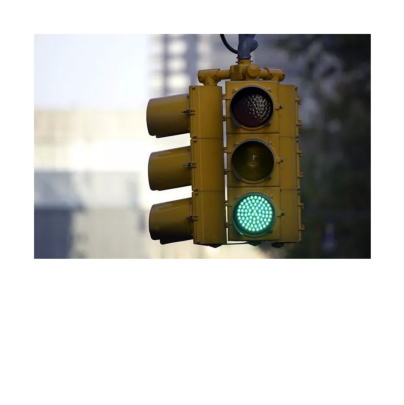

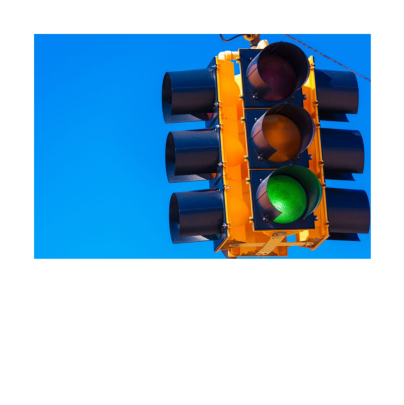

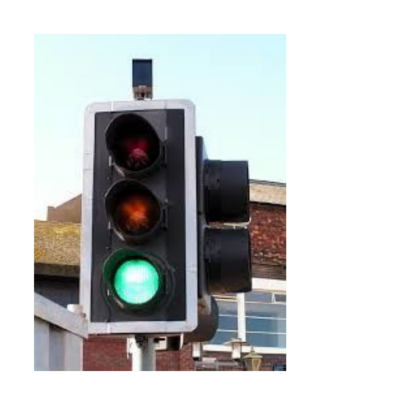

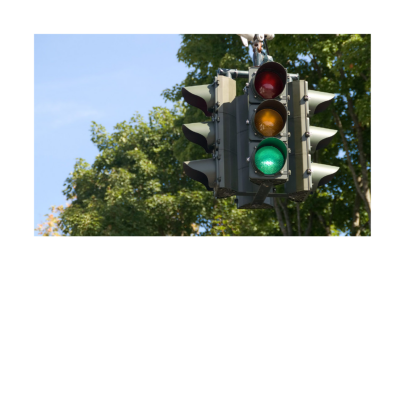

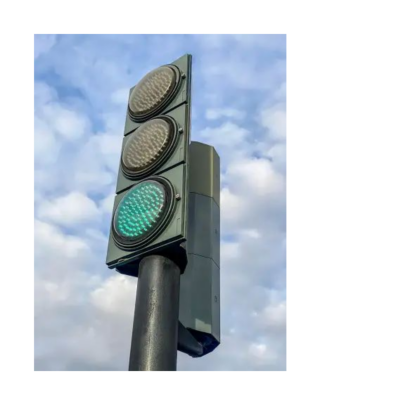

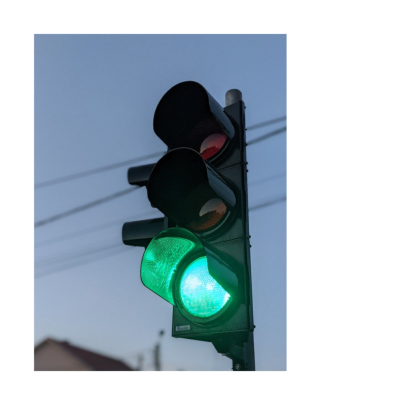

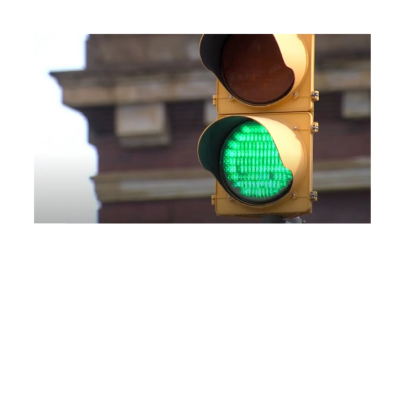

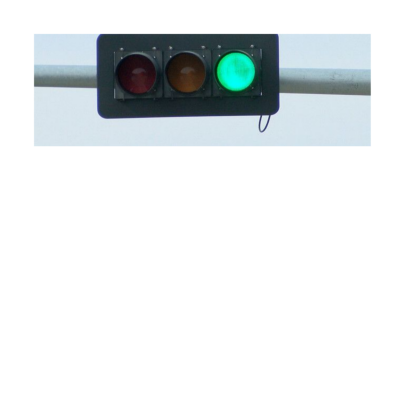

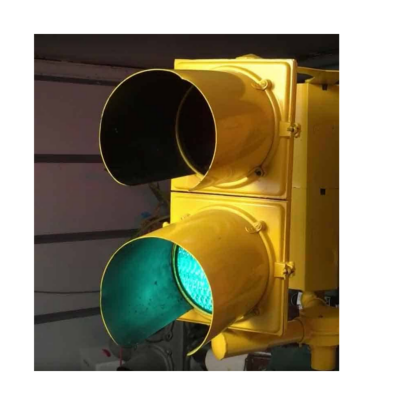

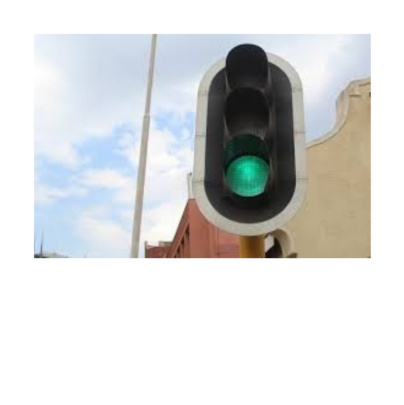

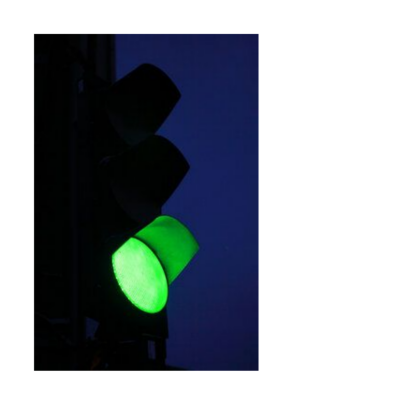

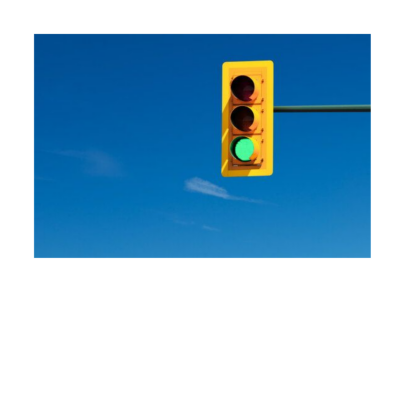

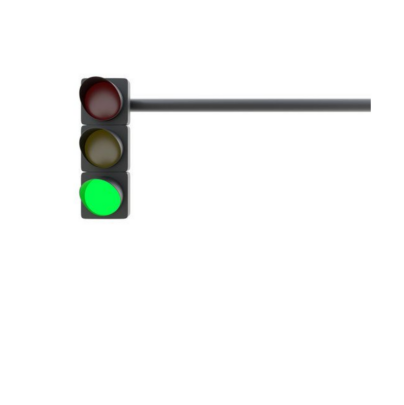

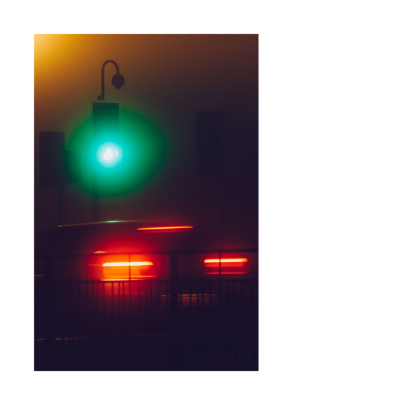

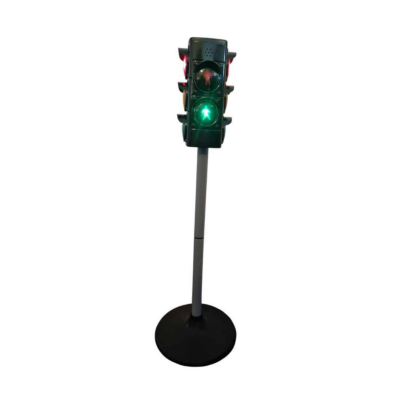

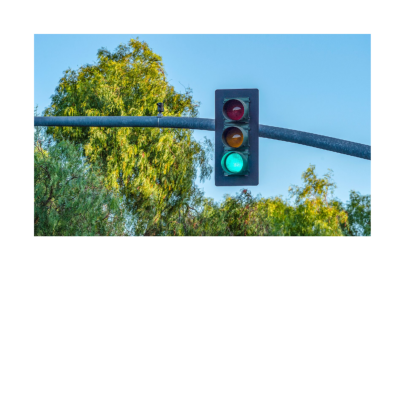

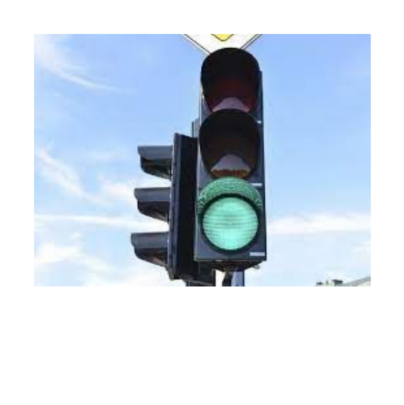

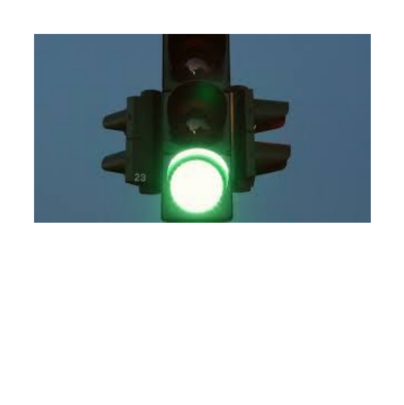

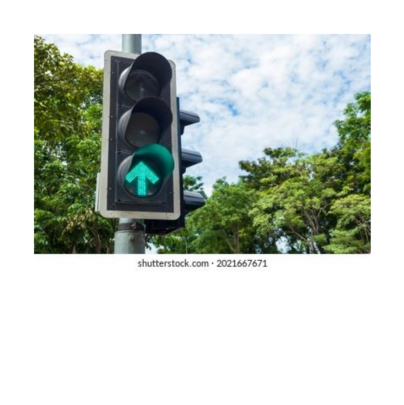

In [ ]:
images = [] #create an empty list called "images"

for image in get_slides(url): #lets fill our list with the images by using the earlier load function, we will also display them using the plot function

    plot(image) #display images

    images.append(load(image)) #load them into the list

images = torch.vstack(images) #change our list of images to a vertically stacked pytorch tensor

In [ ]:
images.shape #we can see that our images are a torch object

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) #we model the images using the function from earlier

tensor([[ -3.1012,  -2.1658,  -3.9337,  ...,  -5.2090,  -2.3702,   1.1422],
        [ -4.4819,  -2.7480,  -0.6969,  ...,  -7.8878,  -3.6136,   2.4800],
        [ -2.9118,   0.2995,  -1.2138,  ..., -10.5132,  -3.3159,   1.8618],
        ...,
        [ -1.5147,  -4.2237,  -3.3696,  ...,  -6.0929,  -1.2195,   1.1166],
        [ -1.6363,  -1.3490,  -3.7905,  ...,  -2.6719,  -1.6264,   2.6652],
        [ -0.2486,  -4.0356,  -2.9221,  ...,  -4.7185,   0.1945,   2.1264]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) #lets save that model to a variable

In [ ]:
y.shape #by modeling the images we reduce the images each to a vector of length 1000 (this is a function of alexnet)

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() #using the modelled images, we find the maximum value in that vector to find the guess of what that image is

In [ ]:
for i in list(guesses): #this will use the earlier labels json file we brought in to label each image based on their max value in the modelled alexnet vector
    print(labels[i])

traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
pill bottle
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
switch, electric switch, electrical switch
switch, electric switch, electrical switch
switch, electric switch, electrical switch
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
power drill
power drill
traffic light, traffic signal, stoplight
traffic light, 

In [ ]:
Y = np.zeros(50,) #lets create an array to differentiate half of our data to train our model
Y[25:] = 1 #we'll set each of the first 25 to be zero and the last 25 to be 1

In [ ]:
Y #we can see how our new array looks here

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() #let's detach our tensor so it no longer affects our modelling
#and we'll go to the cpu and change it to a numpy array

In [ ]:
X.shape #we can see its no longer a pytorch tensor, which will allow us to plot our data using pyplot

(50, 1000)

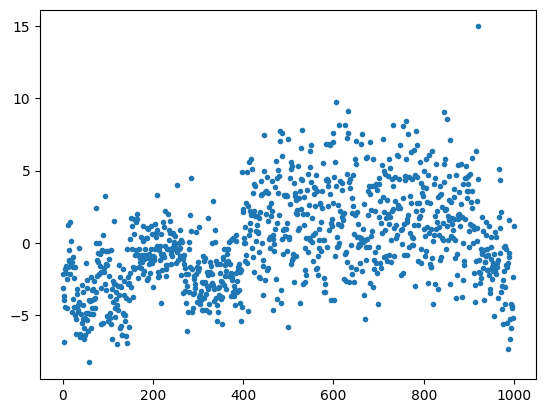

In [ ]:
plt.plot(X[0],'.') #we can see this is the first 1000 values contained in X, one of them is much higher than the rest,
#this is our argmax value, and the corresponding label to this value is our guess

(array([ 18., 115., 242., 277., 176., 118.,  44.,   9.,   0.,   1.]),
 array([-8.29137707, -5.96344233, -3.63550806, -1.30757344,  1.02036119,
         3.34829569,  5.67623043,  8.0041647 , 10.33209896, 12.66003418,
        14.98796844]),
 <BarContainer object of 10 artists>)

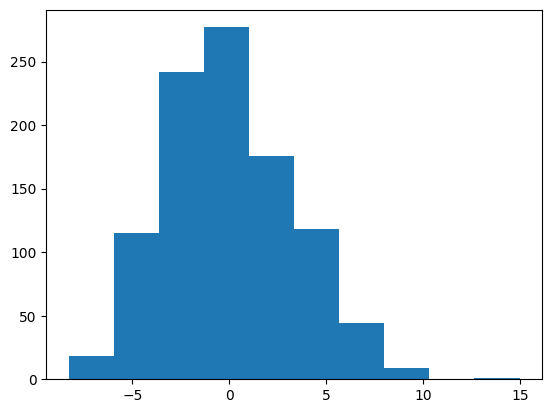

In [ ]:
plt.hist(X[0]) #we can also plot it using a histogram, though only having ten containers might be an issue

In [ ]:
X = GPU_data(X) #lets use our earlier functions to disable gradients on these tensors
Y = GPU_data(Y)

In [ ]:
def softmax(x): #this is an activation function, we use it to define when our "guess" will activate, and we can use this to model much more efficiently
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels): #this function will find our entropy based on our expected values for our data, which will help the weights and biases to fit the data more efficiently
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s) #this function lets us generate random normally distributed numbers with specified mean and stdv

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): #lets use this to find the accuracy of non-gradient torch tensors
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape #our data shape, just to make sure we're still within pytorch tensors

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): #this function will get data (either training or raw) and depending on mode it will guess and update its modelling program
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): #using matrix multiplication with data vs the weights will give us our model

    return x@w[0]

In [ ]:
def make_plots(): #this function will be our training function

    acc_train = acc(model(x,w),y) #find the accuracy of our current w + b

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train}) #log the accuracy into weights and biases to update our program

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #this creates a new weights and biases project and defines our settings for it
c = wb.config

c.h = 0.001 #here are our config values
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))] #we use the truncated normal distribution function from earlier to set our starting weights, we will update from there

optimizer = torch.optim.Adam(w, lr=c.h) #we use the pytorch optimizer to update the weights and biases

for i in range(c.epochs): #we'll train 100000 times by default because that is our epochs value

    x,y = get_batch('train') #use the get_batch data from earlier and set it to training mode

    loss = cross_entropy(softmax(model(x,w)),y) #we'll use our cross entropy function to find our loss for training

    optimizer.zero_grad() #turn optimizer gradient off
    loss.backward() #propogate our loss into our w + b
    optimizer.step() #move forward in the optimizer to the next training run

    wb.log({"loss": loss}) #log our loss in each run to track it as it improves

    make_plots() #make the plots in w + b so we can get a visualization of our running accuracy


<ipython-input-2-99431bc89e0f>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device) #turn our data into a torch tensor with gradient


https://api.wandb.ai/links/rcmcd11/sf66v67i

https://api.wandb.ai/links/rcmcd11/ss3e9mbe

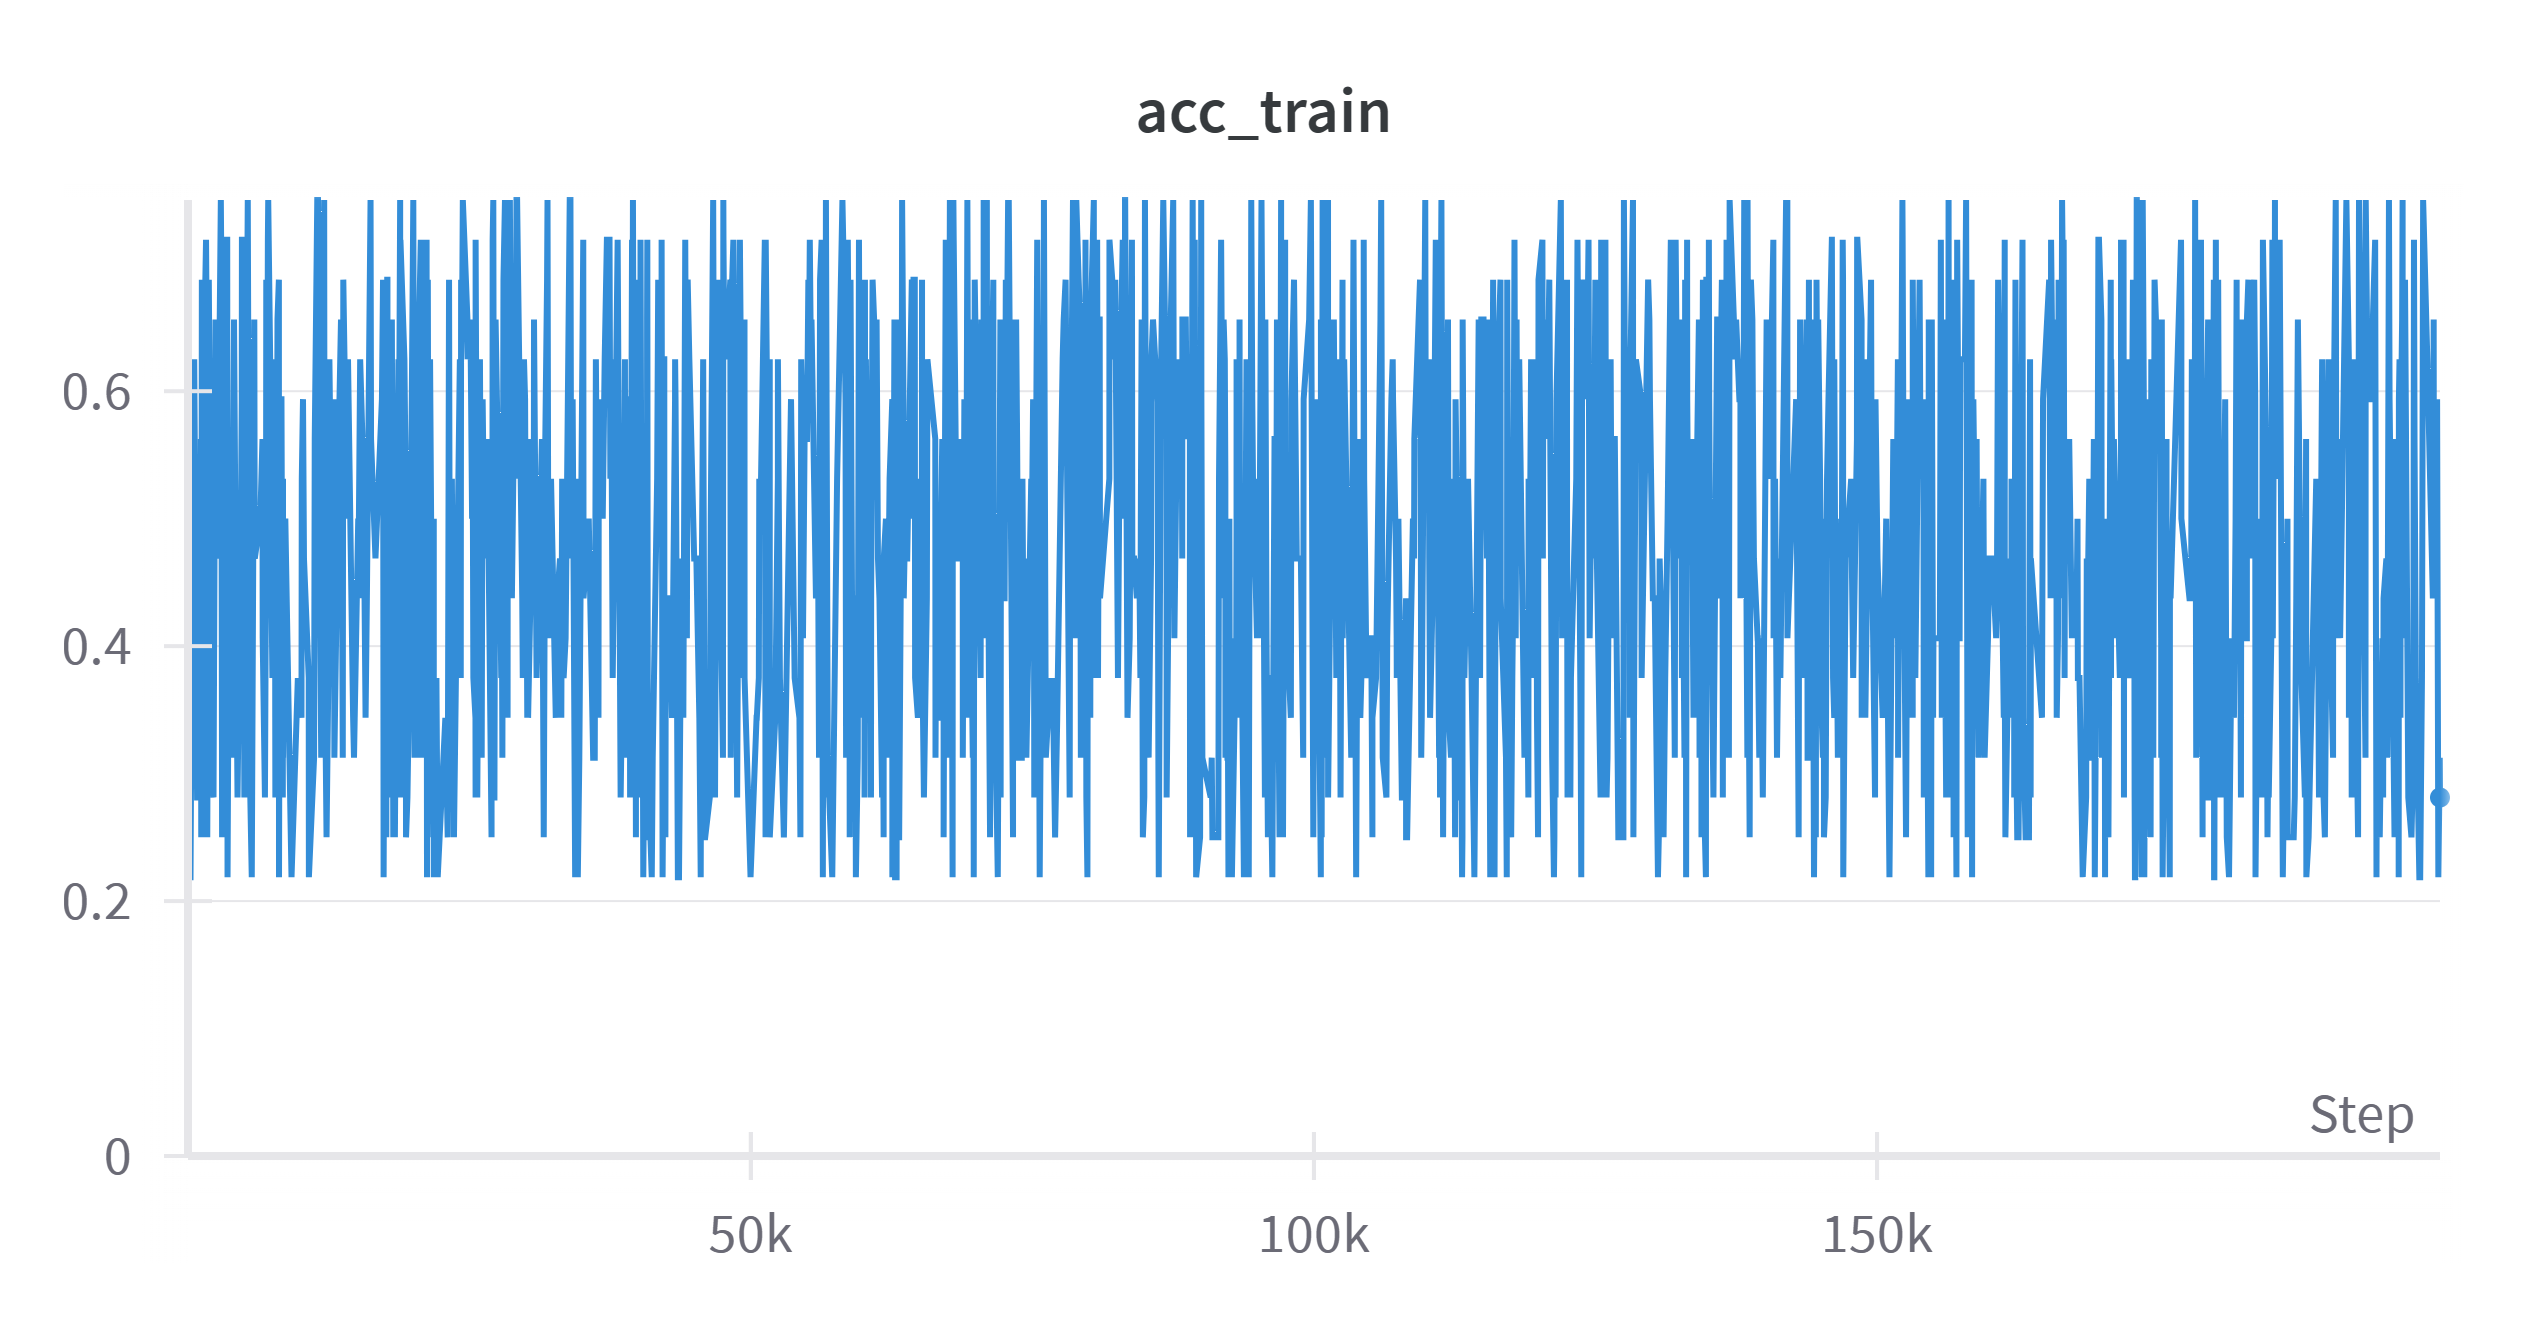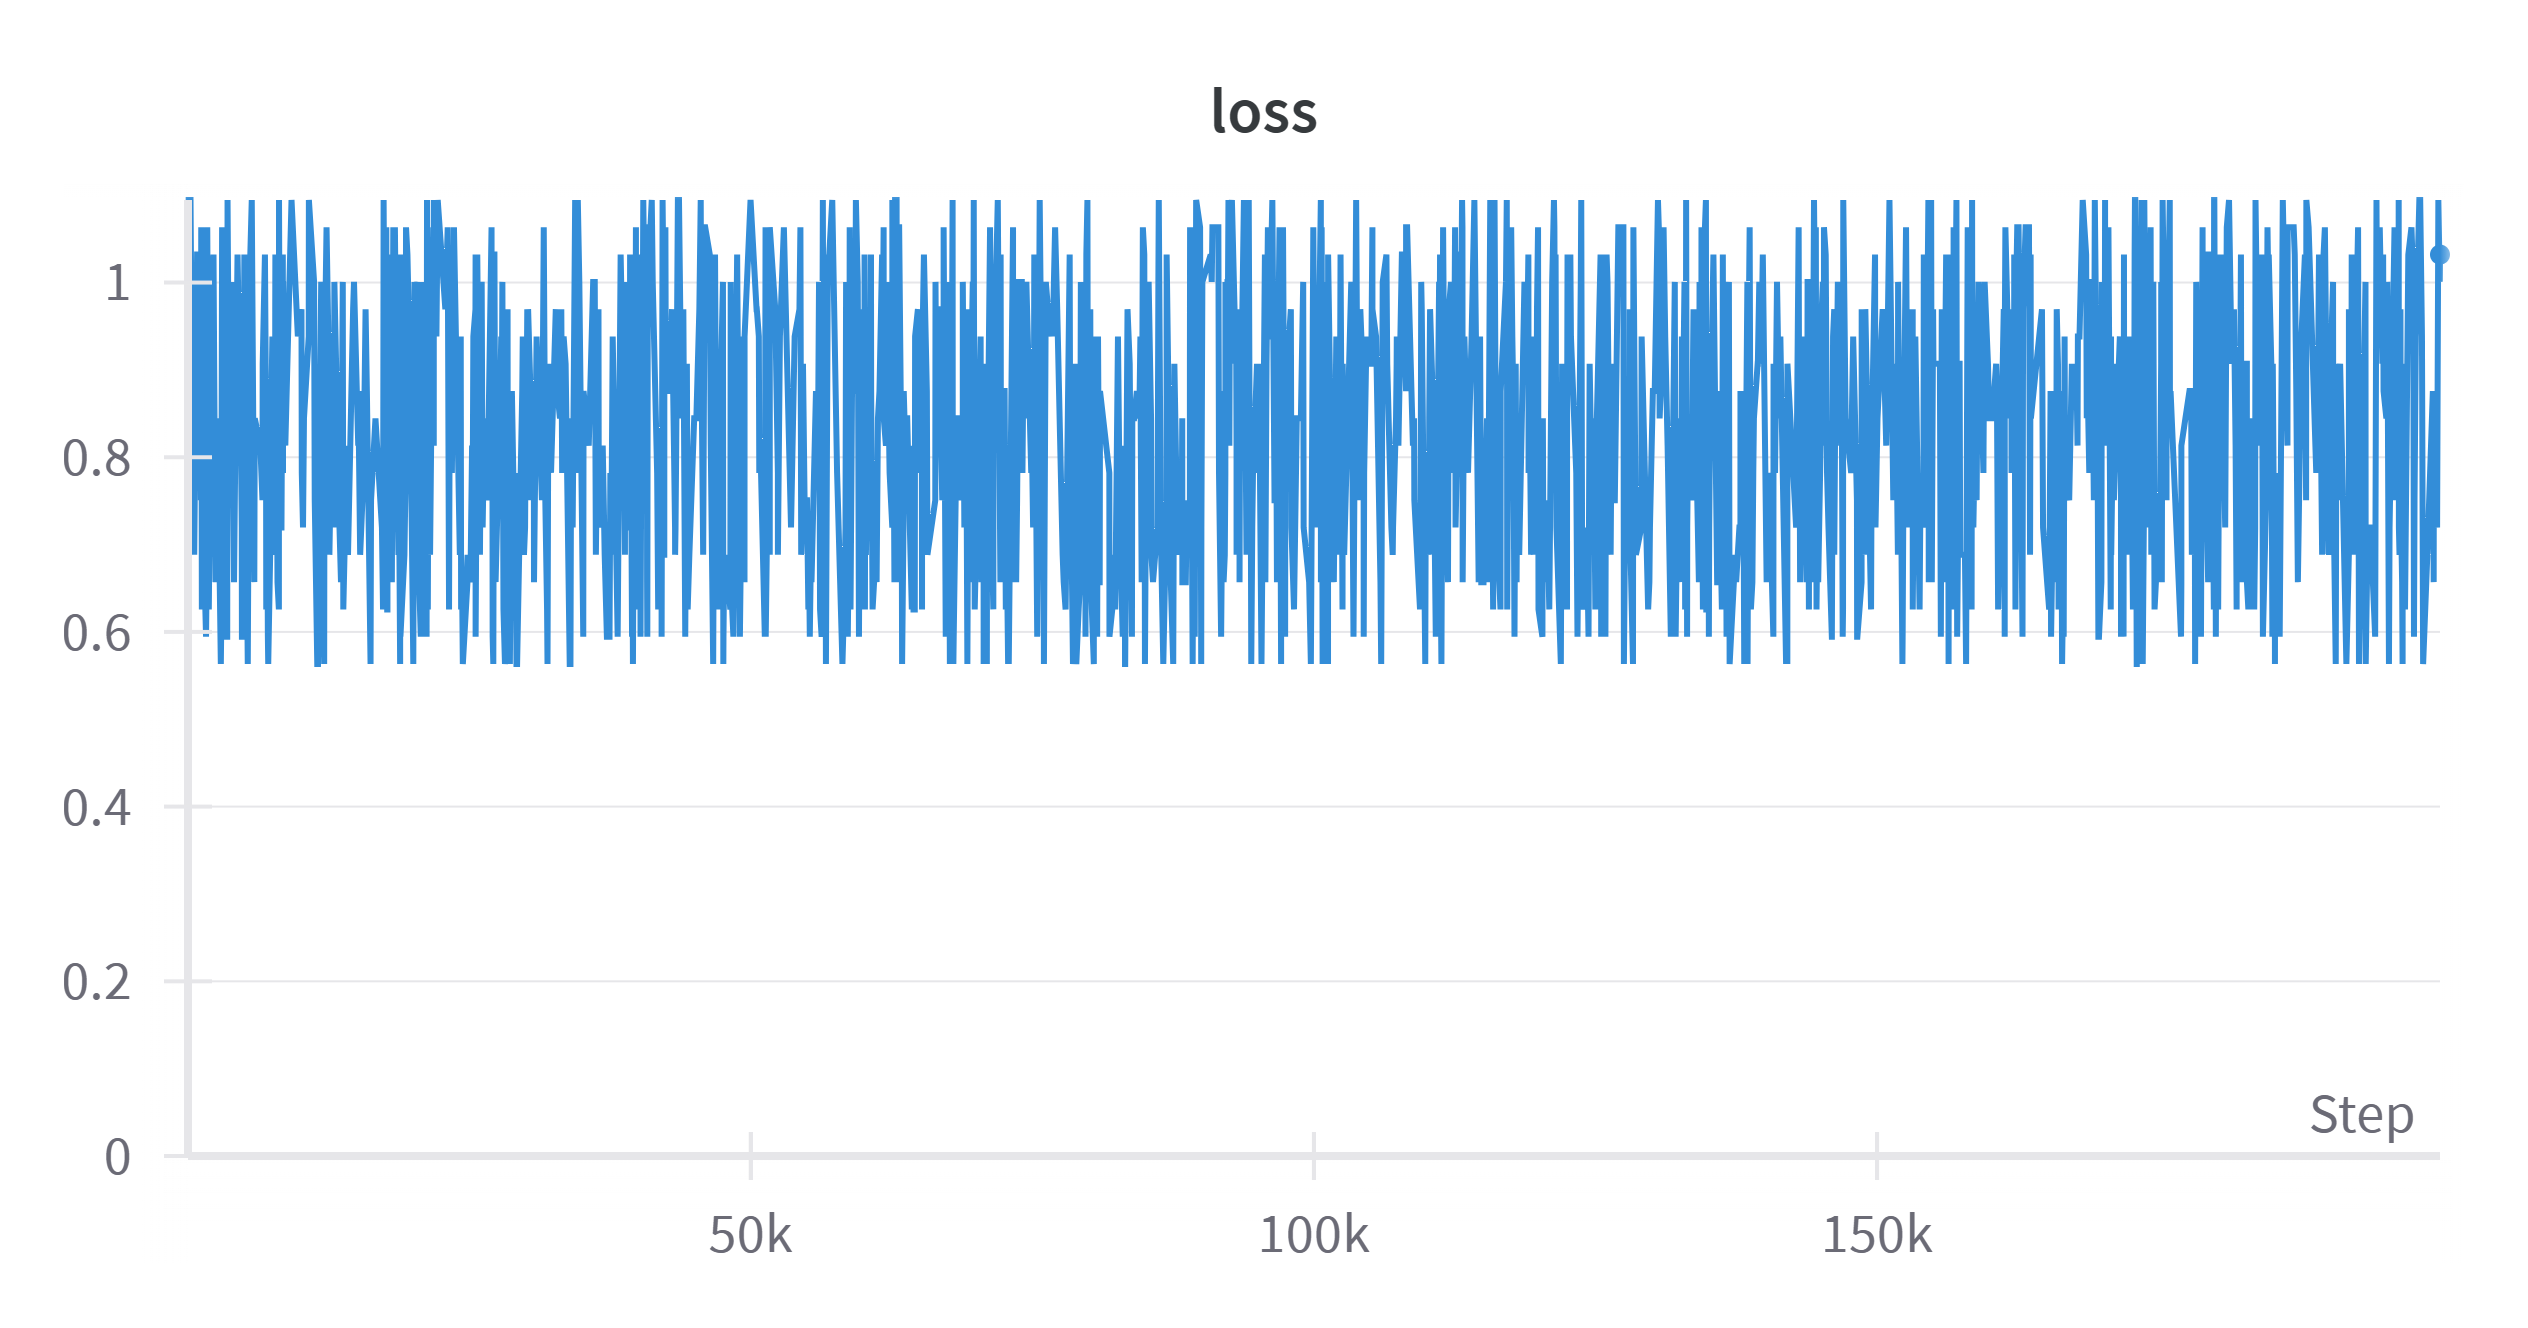